In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# tls.set_config_file(world_readable=True, sharing='public')
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
import json
from pandas.io.json import json_normalize
from tqdm import tqdm
import os

Data Preprocessing

In [2]:
yelp_bdf = pd.read_json('C:/Users/Shreya Gokhe/Documents/MA641-TS/Sentiment/yelp_academic_dataset_business.json', lines = True)

In [3]:
yelp_check = pd.read_json('C:/Users/Shreya Gokhe/Documents/MA641-TS/Sentiment/yelp_academic_dataset_checkin.json', lines = True)

In [4]:
data = {'stars': [], 'text': []}

with open('C:/Users/Shreya Gokhe/Documents/MA641-TS/Sentiment/yelp_academic_dataset_review.json',encoding="utf8") as f:
    for line in tqdm(f):
        review = json.loads(line)
        data['stars'].append(review['stars'])
        data['text'].append(review['text'])


8021122it [03:59, 33460.74it/s]


In [5]:

yelp_tip = pd.read_json('C:/Users/Shreya Gokhe/Documents/MA641-TS/Sentiment/yelp_academic_dataset_tip.json', lines = True)

In [6]:
yelp_user = {'compliment_profile': [], 'compliment_writer': [],'cool': [], 'elite': [], 'fans': [], 'friends': [],
             'funny': [], 'name': [], 'review_count': [],'useful': [], 'user_id': [], 'yelping_since': []}

with open('C:/Users/Shreya Gokhe/Documents/MA641-TS/Sentiment/yelp_academic_dataset_user.json',encoding="utf8") as f:
    for line in tqdm(f):
        review = json.loads(line)
        yelp_user['compliment_profile'].append(review['compliment_profile'])
        yelp_user['compliment_writer'].append(review['compliment_writer'])
        yelp_user['cool'].append(review['cool'])
        yelp_user['elite'].append(review['elite'])
        yelp_user['fans'].append(review['fans'])
        yelp_user['friends'].append(review['friends'])
        yelp_user['funny'].append(review['funny'])
        yelp_user['name'].append(review['name'])
        yelp_user['review_count'].append(review['review_count'])
        yelp_user['useful'].append(review['useful'])
        yelp_user['user_id'].append(review['user_id'])
        yelp_user['yelping_since'].append(review['yelping_since'])        


1968703it [01:52, 17462.40it/s]


In [7]:
df_business = pd.DataFrame(yelp_bdf)
print(df_business.shape)
df_business.head(10)


(209393, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,"6870 S Rainbow Blvd, Ste 117",Las Vegas,NV,89118,36.063977,-115.241463,3.5,81,1,"{'BusinessParking': '{'garage': False, 'street...","Dry Cleaning & Laundry, Local Services, Laundr...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
7,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Auto Repair, Oil Change Stations, Automotive, ...","{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'..."
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."


In [8]:
df_business[df_business['hours'].notnull()].count()


business_id     164550
name            164550
address         164550
city            164550
state           164550
postal_code     164550
latitude        164550
longitude       164550
stars           164550
review_count    164550
is_open         164550
attributes      146796
categories      164546
hours           164550
dtype: int64

In [9]:
df_checkin = pd.DataFrame(yelp_check)
print(df_checkin.shape)
df_checkin.head(10)


(175187, 2)


,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
5,--9e1ONYQuAa-CB_Rrw7Tw,"2010-02-08 05:56:47, 2010-02-15 04:47:42, 2010..."
6,--DaPTJW3-tB1vP-PfdTEg,"2012-06-03 17:46:09, 2012-08-04 16:19:52, 2012..."
7,--DdmeR16TRb3LsjG0ejrQ,"2012-11-02 21:26:42, 2012-11-02 22:30:43, 2012..."
8,--EF5N7P70J_UYBTPypYlA,"2018-05-25 19:52:07, 2018-09-18 16:09:44, 2019..."
9,--EX4rRznJrltyn-34Jz1w,"2010-02-26 17:05:40, 2012-12-29 20:05:04, 2012..."


In [10]:
df_rev = pd.DataFrame(data)
print(df_rev.shape)
df_rev.head(10)


(8021122, 2)


,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."
5,5.0,This is definitely my favorite fast food sub s...
6,5.0,"Really good place with simple decor, amazing f..."
7,5.0,"Awesome office and staff, very professional an..."
8,5.0,Most delicious authentic Italian I've had in t...
9,4.0,I have been here twice. Very nice and laid bac...


In [11]:
df_tip = pd.DataFrame(yelp_tip)
print(df_tip.shape)
df_tip.head(10)

(1320761, 5)


,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0
7,gxVQZJVeKBUk7jEhSyqv-A,5FIOXmUE3qMviX9GafGH-Q,Get a tsoynami for sure.,2010-01-30 02:03:16,0
8,2hdR7KYAmnCk2FjTnPFsuw,rcaPajgKOJC2vo_l3xa42A,Kelly is an awesome waitress there!,2012-05-29 02:05:56,0
9,DsWg3leomfasGs3j0rOfbQ,hfBrethLHS9iXeBNR8MtzQ,Check out the great assortment of organic & co...,2011-09-30 18:38:47,0


In [12]:
df_user = pd.DataFrame(yelp_user)
print(df_user.shape)
df_user.head(10)


(1968703, 12)


,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,1,10,227,,14,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",225,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,2007-07-06 03:27:11
1,5,21,400,"2008,2009,2010,2011,2012,2013",27,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",316,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,2008-04-28 01:29:25
2,0,4,103,2010,5,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",125,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,2008-08-28 23:40:05
3,0,2,84,2009,6,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",160,John,206,233,QaELAmRcDc5TfJEylaaP8g,2008-09-20 00:08:14
4,2,19,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",400,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,2008-08-09 00:30:27
5,7,8,155,2007,15,"E-fXXmALnZTPmzzL6rV4cQ, L2g6vS1GDfqLEpiDOFfCkA...",192,Steve,186,642,z5_82komKV3mI4ASGe2-FQ,2007-02-27 07:09:40
6,0,0,6,,0,"1pKOc55fFx09J5t2rPzTxw, HYpE14yYEKSgu3VNVzObHA...",4,Stuart,12,29,ttumcu6hWshk_EJVWrduDg,2010-05-12 16:30:08
7,62,293,2878,"2011,2012,2013,2014,2015,2016,2017,2018",137,"c-Dja5bexzEWBufNsHfRrQ, 02HJNyOzzYXvEKVApJb8GQ...",2446,Jennifer,822,4127,f4_MRNHvN-yRn7EA8YWRxg,2011-01-17 00:18:23
8,0,2,34,,4,"YwaKGmRNnSa3R3N4Hf9jLw, v9YpDzYkJarRbzvVIY-63g...",21,Justin,14,68,UYACF30806j2mfbB5vdmJA,2007-07-24 23:55:21
9,1,17,426,"2008,2009",31,"tnfVwTpuPlR6W2xEAMiqsg, Bd_16T8Dva27lF5LIrUmcQ...",372,Claire,218,587,QG13XBbgHWydzThRBGJtyw,2007-06-04 00:14:10


In [13]:
bus_chk = pd.merge(df_business , df_checkin ,how='inner', on='business_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [14]:
bus_chk

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,51.049673,-114.079977,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...","2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.841694,-79.399755,3.0,55,1,"{'NoiseLevel': ''average'', 'RestaurantsPriceR...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...","2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,16432 Old Statesville Rd,Huntersville,NC,28078,35.437106,-80.843688,4.0,65,1,"{'BusinessAcceptsCreditCards': 'True', 'Caters...","Breweries, Food","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...","2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.378589,-111.748145,4.5,5,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Weight Loss Centers, Doctors, Sports Medicine,...","{'Monday': '8:30-16:30', 'Tuesday': '8:30-16:3...",2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.362813,-111.908995,3.0,15,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Hair Salons, Beauty & Spas",None,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,7 Dim Sum,45 Baldwin Street,Toronto,ON,M5T 1L1,43.655822,-79.393727,3.5,6,0,"{'WiFi': 'u'free'', 'RestaurantsTableService':...","Chinese, Asian Fusion, Dim Sum, Restaurants, V...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...","2017-05-06 20:05:15, 2017-05-12 22:37:03, 2017..."
175183,zzwaS0xn1MVEPEf0hNLjew,Dilly Dally Lounge,3639 E Indian School Rd,Phoenix,AZ,85018,33.494612,-112.002760,3.5,73,1,"{'HasTV': 'True', 'RestaurantsGoodForGroups': ...","Nightlife, Lounges, Bars, Dive Bars","{'Monday': '15:0-2:0', 'Tuesday': '15:0-2:0', ...","2010-02-16 02:09:56, 2010-07-05 05:40:48, 2010..."
175184,zzwhN7x37nyjP0ZM8oiHmw,Carmody's Grille,4905 Grand Ave,Pittsburgh,PA,15225,40.509969,-80.125346,4.0,75,1,"{'HasTV': 'True', 'BikeParking': 'False', 'Res...","American (New), Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...","2016-03-06 13:27:02, 2016-03-09 00:41:53, 2016..."
175185,zzwicjPC9g246MK2M1ZFBA,Sizzler,1050 S Country Club Dr,Mesa,AZ,85210,33.395974,-111.840651,3.0,81,1,"{'BikeParking': 'True', 'Ambience': '{'romanti...","Buffets, Salad, American (Traditional), Seafoo...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","2012-09-22 00:26:15, 2012-09-23 20:12:00, 2012..."


In [15]:
tip_chk = pd.merge(df_tip , df_checkin ,how='inner', on='business_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [16]:
tip_chk

,user_id,business_id,text,date_x,compliment_count,date_y
0,4YHZzwlxEMi7zWO6Osszdw,--1UhMGODdWsrMastO9DZw,"Delicious! One of the best burritos, salsa and...",2017-07-26 17:26:25,0,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,NBQnPd9dhwRkCvZRg_SzkQ,--1UhMGODdWsrMastO9DZw,Probably my favorite Mexican place for tacos i...,2019-11-27 21:55:42,0,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
2,Ne6MV51v03G11mr-l0eZHg,--1UhMGODdWsrMastO9DZw,It is 100% my favourite Mexican restaurant in ...,2019-07-24 14:51:39,0,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
3,EiP1OFgs-XGcKZux0OKWIA,--6MefnULPED_I942VcFNA,BBQ pork is sold out early on Saturday,2013-03-24 01:12:20,0,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
4,0cUzu82KJiE5_xZA0Iu3ZQ,--6MefnULPED_I942VcFNA,"$7.50 lunch special, dish of rice/noodles with...",2017-01-15 17:31:22,0,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
...,...,...,...,...,...,...
1313011,-wL30dfLY6z2QKoJpUu2nA,zzzaIBwimxVej4tY6qFOUQ,When will you reopen?? We have tried going fo...,2014-09-01 18:53:26,0,"2012-10-12 16:26:35, 2012-10-19 19:31:14, 2012..."
1313012,uqcM00Kf4Nr23PmS-VIR5g,zzzaIBwimxVej4tY6qFOUQ,"Good fingers ad cheaper than other places, hot...",2013-06-17 02:43:55,0,"2012-10-12 16:26:35, 2012-10-19 19:31:14, 2012..."
1313013,uL4r70bvu4rZEBCtjwFgtQ,zzzaIBwimxVej4tY6qFOUQ,Very good service! Fresh good quality tasting ...,2013-01-06 04:21:10,0,"2012-10-12 16:26:35, 2012-10-19 19:31:14, 2012..."
1313014,yO6t_rtiEzOonBPxFOCCmA,zzzaIBwimxVej4tY6qFOUQ,Chicken is super delicious and the sauce is AM...,2013-01-27 22:40:58,0,"2012-10-12 16:26:35, 2012-10-19 19:31:14, 2012..."


In [17]:
tip_bus = pd.merge(df_tip , df_business ,how='inner', on='business_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [18]:
tip_bus

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,4YHZzwlxEMi7zWO6Osszdw,--1UhMGODdWsrMastO9DZw,"Delicious! One of the best burritos, salsa and...",2017-07-26 17:26:25,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,51.049673,-114.079977,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
1,NBQnPd9dhwRkCvZRg_SzkQ,--1UhMGODdWsrMastO9DZw,Probably my favorite Mexican place for tacos i...,2019-11-27 21:55:42,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,51.049673,-114.079977,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
2,Ne6MV51v03G11mr-l0eZHg,--1UhMGODdWsrMastO9DZw,It is 100% my favourite Mexican restaurant in ...,2019-07-24 14:51:39,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,51.049673,-114.079977,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
3,EiP1OFgs-XGcKZux0OKWIA,--6MefnULPED_I942VcFNA,BBQ pork is sold out early on Saturday,2013-03-24 01:12:20,0,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.841694,-79.399755,3.0,55,1,"{'NoiseLevel': ''average'', 'RestaurantsPriceR...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."
4,0cUzu82KJiE5_xZA0Iu3ZQ,--6MefnULPED_I942VcFNA,"$7.50 lunch special, dish of rice/noodles with...",2017-01-15 17:31:22,0,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.841694,-79.399755,3.0,55,1,"{'NoiseLevel': ''average'', 'RestaurantsPriceR...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320756,-wL30dfLY6z2QKoJpUu2nA,zzzaIBwimxVej4tY6qFOUQ,When will you reopen?? We have tried going fo...,2014-09-01 18:53:26,0,Guthrie's,6728 W Cheyenne Ave,Las Vegas,NV,89108,36.218424,-115.243158,3.5,38,0,"{'WiFi': ''no'', 'RestaurantsGoodForGroups': '...","Restaurants, Southern","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
1320757,uqcM00Kf4Nr23PmS-VIR5g,zzzaIBwimxVej4tY6qFOUQ,"Good fingers ad cheaper than other places, hot...",2013-06-17 02:43:55,0,Guthrie's,6728 W Cheyenne Ave,Las Vegas,NV,89108,36.218424,-115.243158,3.5,38,0,"{'WiFi': ''no'', 'RestaurantsGoodForGroups': '...","Restaurants, Southern","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
1320758,uL4r70bvu4rZEBCtjwFgtQ,zzzaIBwimxVej4tY6qFOUQ,Very good service! Fresh good quality tasting ...,2013-01-06 04:21:10,0,Guthrie's,6728 W Cheyenne Ave,Las Vegas,NV,89108,36.218424,-115.243158,3.5,38,0,"{'WiFi': ''no'', 'RestaurantsGoodForGroups': '...","Restaurants, Southern","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
1320759,yO6t_rtiEzOonBPxFOCCmA,zzzaIBwimxVej4tY6qFOUQ,Chicken is super delicious and the sauce is AM...,2013-01-27 22:40:58,0,Guthrie's,6728 W Cheyenne Ave,Las Vegas,NV,89108,36.218424,-115.243158,3.5,38,0,"{'WiFi': ''no'', 'RestaurantsGoodForGroups': '...","Restaurants, Southern","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."


In [19]:
df_business['stars'].round(decimals=1)

0         3.5
1         5.0
2         5.0
3         2.5
4         4.5
         ... 
209388    4.0
209389    2.0
209390    3.5
209391    5.0
209392    5.0
Name: stars, Length: 209393, dtype: float64

### Which review awarded what type of star for business DF

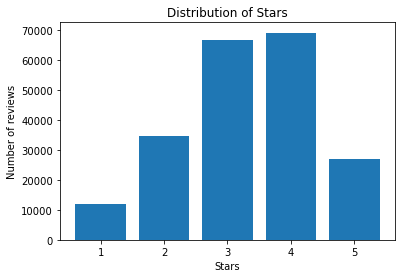

In [20]:
values, counts = np.unique(df_business['stars'].apply(np.floor), return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

### Which review awarded what type of star for review DF

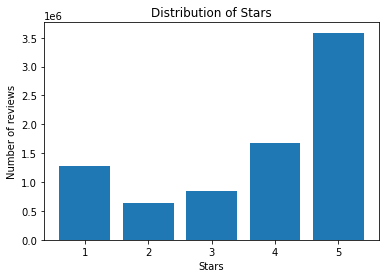

In [21]:
values, counts = np.unique(df_rev['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

#### We will consider 1,2 as negative comments and 3,4,5 as positive

In [22]:
df_rev["Target"] = np.where(df_rev["stars"] >= 3, 1, 0)
df_rev.head(5)

,stars,text,Target
0,2.0,"As someone who has worked with many museums, I...",0
1,1.0,I am actually horrified this place is still in...,0
2,5.0,I love Deagan's. I do. I really do. The atmosp...,1
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0
4,4.0,"Oh happy day, finally have a Canes near my cas...",1


#### Plotting satisfaction in 1 and 0

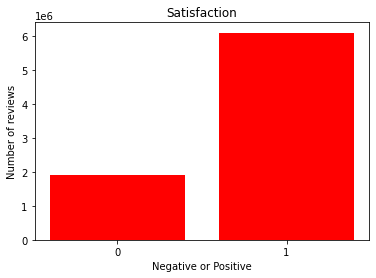

In [23]:
values, counts = np.unique(df_rev['Target'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['0','1'], color='red')
plt.title('Satisfaction')
plt.xlabel('Negative or Positive')
plt.ylabel('Number of reviews')
plt.show()

In [24]:
df_rev_fin = df_rev[['text','Target']]
df_rev_fin.head(5)

,text,Target
0,"As someone who has worked with many museums, I...",0
1,I am actually horrified this place is still in...,0
2,I love Deagan's. I do. I really do. The atmosp...,1
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0
4,"Oh happy day, finally have a Canes near my cas...",1


### Listing down categories and visualizing the count of each category

In [49]:
yelp_bdf['categories'].head(10)

0    Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1    Health & Medical, Fitness & Instruction, Yoga,...
2                     Pets, Pet Services, Pet Groomers
3    Hardware Stores, Home Services, Building Suppl...
4    Home Services, Plumbing, Electricians, Handyma...
5    Auto Repair, Automotive, Oil Change Stations, ...
6    Dry Cleaning & Laundry, Local Services, Laundr...
7    Auto Repair, Oil Change Stations, Automotive, ...
8    Ethnic Food, Food Trucks, Specialty Food, Impo...
9    Martial Arts, Gyms, Fitness & Instruction, Act...
Name: categories, dtype: object

Text(0.5, 1.02, 'Count of Categories')

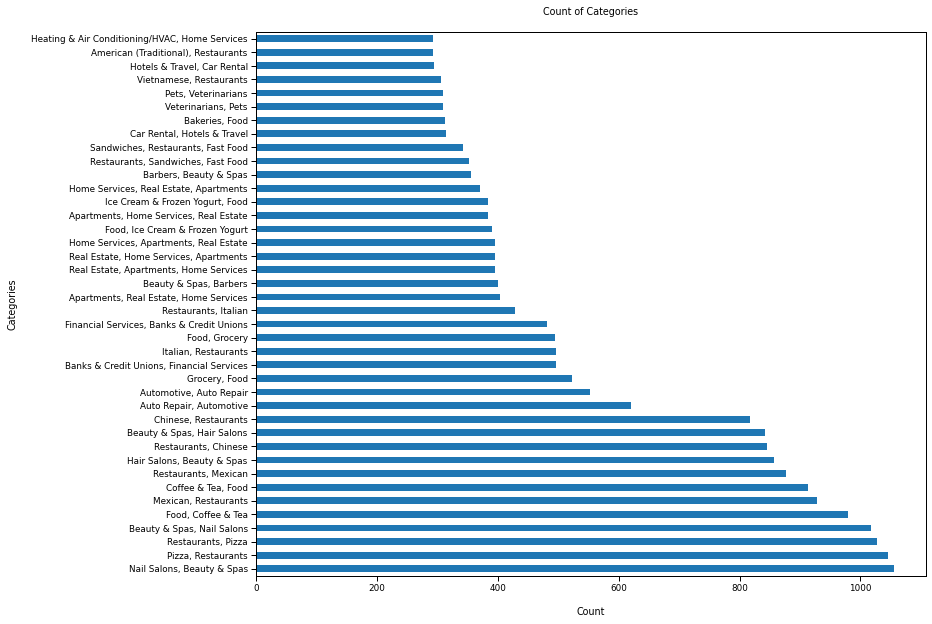

In [59]:
yelp_bdf['categories'].value_counts()[:40].plot(kind='barh', figsize=(12, 10))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Categories", labelpad=14)
plt.title("Count of Categories", y=1.02)

### Splitting date and time and creating new columns for Date, time, month and year

In [67]:
from datetime import datetime
tip_bus['date'] = pd.to_datetime(tip_bus['date'])

In [75]:
tip_bus['Date'] = tip_bus['date'].dt.strftime('%Y/%m/%d')
tip_bus['Time'] = tip_bus['date'].dt.strftime('%H:%M')


In [88]:
tip_bus['month'] = tip_bus['date'].dt.month
tip_bus['year'] = tip_bus['date'].dt.year

In [89]:
tip_bus.head()

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,...,stars,review_count,is_open,attributes,categories,hours,Date,Time,month,year
0,4YHZzwlxEMi7zWO6Osszdw,--1UhMGODdWsrMastO9DZw,"Delicious! One of the best burritos, salsa and...",2017-07-26 17:26:25,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,...,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",2017/07/26,17:26,7,2017
1,NBQnPd9dhwRkCvZRg_SzkQ,--1UhMGODdWsrMastO9DZw,Probably my favorite Mexican place for tacos i...,2019-11-27 21:55:42,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,...,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",2019/11/27,21:55,11,2019
2,Ne6MV51v03G11mr-l0eZHg,--1UhMGODdWsrMastO9DZw,It is 100% my favourite Mexican restaurant in ...,2019-07-24 14:51:39,0,The Spicy Amigos,821 4 Avenue SW,Calgary,AB,T2P 0K5,...,4.0,27,1,"{'RestaurantsAttire': 'u'casual'', 'GoodForMea...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",2019/07/24,14:51,7,2019
3,EiP1OFgs-XGcKZux0OKWIA,--6MefnULPED_I942VcFNA,BBQ pork is sold out early on Saturday,2013-03-24 01:12:20,0,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,...,3.0,55,1,"{'NoiseLevel': ''average'', 'RestaurantsPriceR...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",2013/03/24,01:12,3,2013
4,0cUzu82KJiE5_xZA0Iu3ZQ,--6MefnULPED_I942VcFNA,"$7.50 lunch special, dish of rice/noodles with...",2017-01-15 17:31:22,0,John's Chinese BBQ Restaurant,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,...,3.0,55,1,"{'NoiseLevel': ''average'', 'RestaurantsPriceR...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",2017/01/15,17:31,1,2017


### Grouping months and years and then plotting the counting of reviews 

In [90]:
grped_year = tip_bus.groupby(['year'])['business_id'].count()
grped_month = tip_bus.groupby(['month'])['business_id'].count()


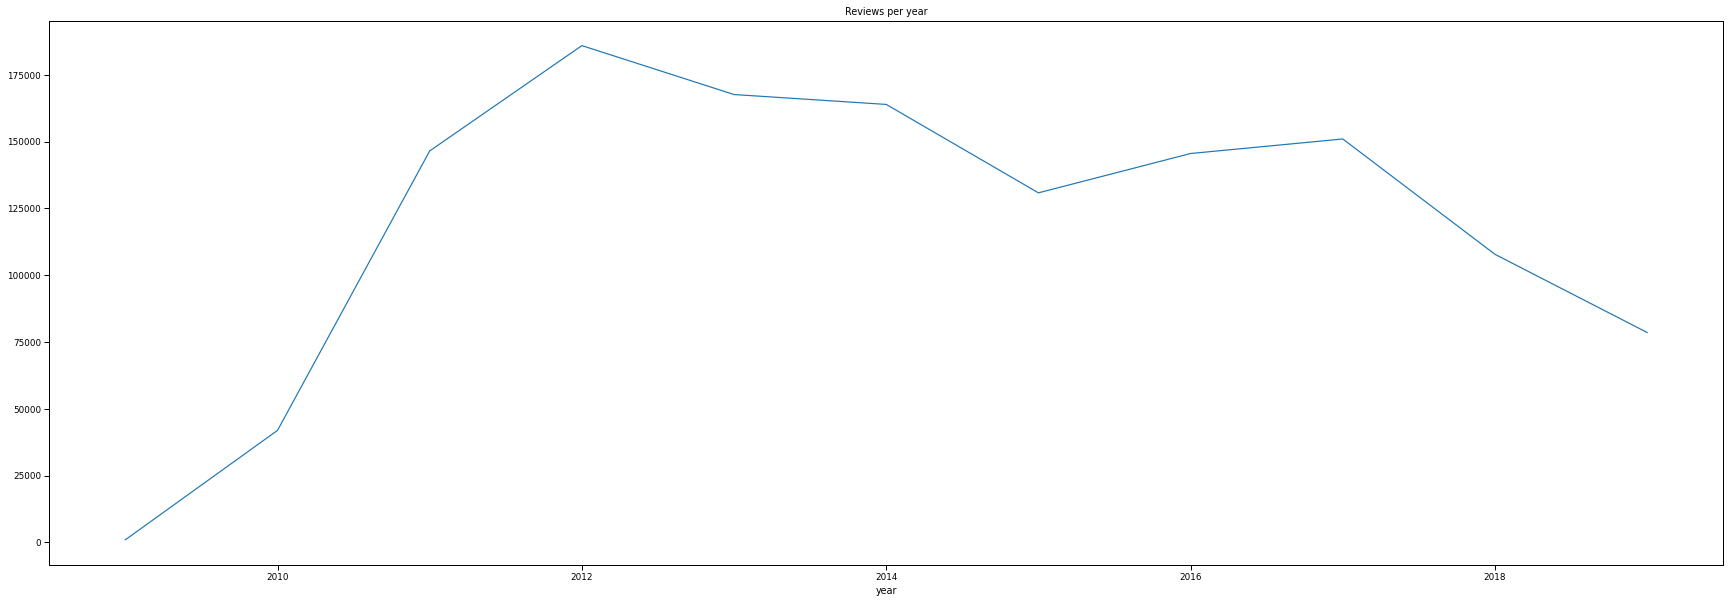

In [93]:
ts = pd.Series(grped_year)
ts.plot(kind='line', figsize=(30,10),title='Reviews per year')
plt.show()

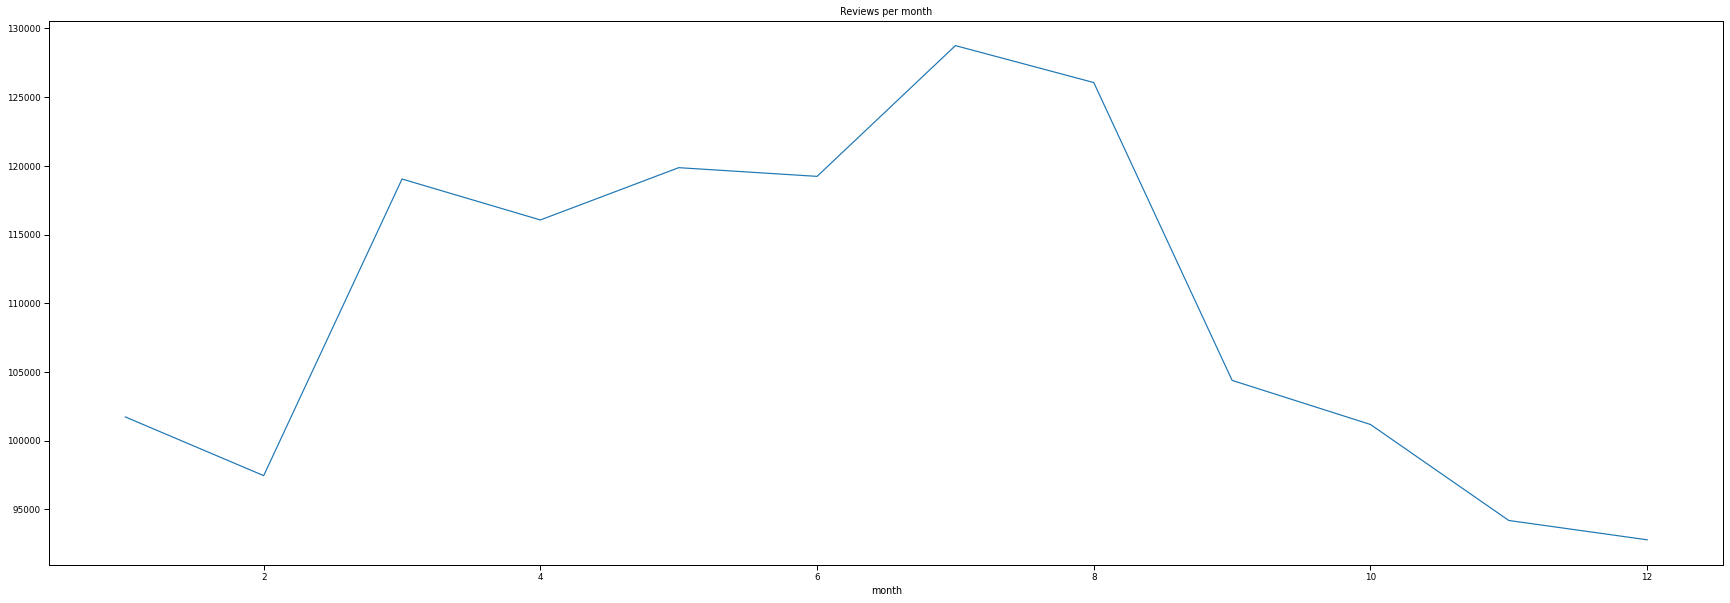

In [94]:
ts = pd.Series(grped_month)
ts.plot(kind='line', figsize=(30,10),title='Reviews per month')
plt.show()

### Listing the top 85 cities which are most reviewed  

In [167]:
city_cout = pd.DataFrame(yelp_bdf['city'].value_counts()[:85])
state_cout = pd.DataFrame(yelp_bdf['state'].value_counts()[:12])

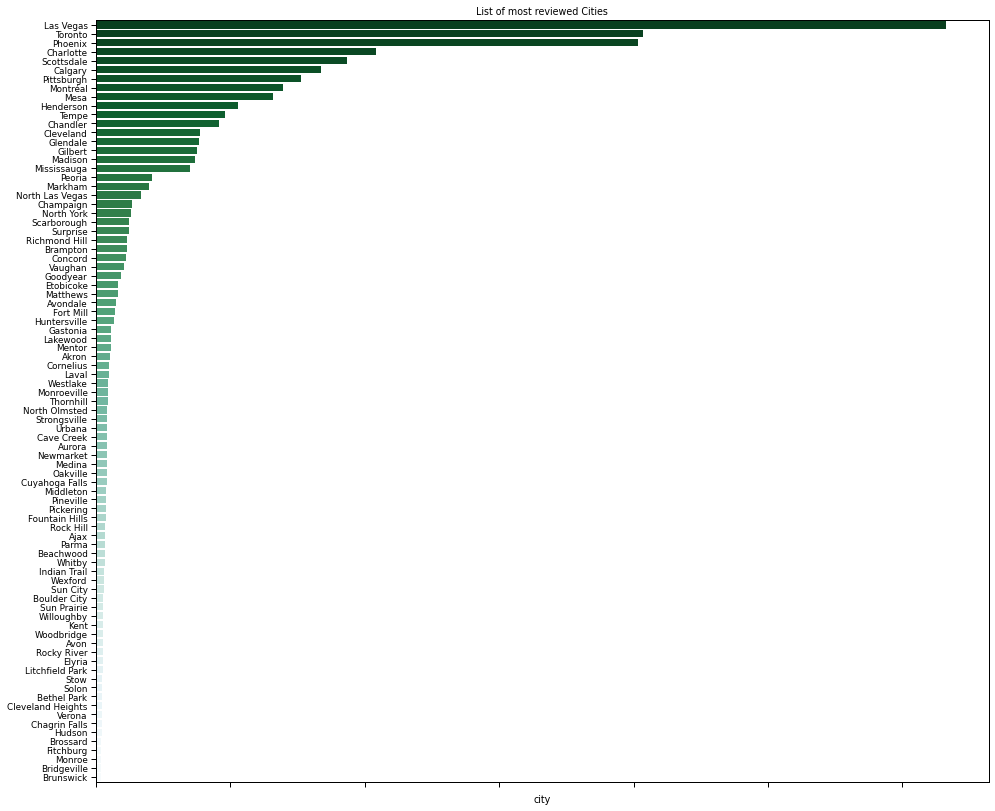

In [170]:
plt.figure(figsize=(16,14))
g = sns.barplot(y=city_cout.index, x=city_cout['city'], palette = 'BuGn_r')
plt.title('List of most reviewed Cities');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()


### Listing the top 12 states which are most reviewed

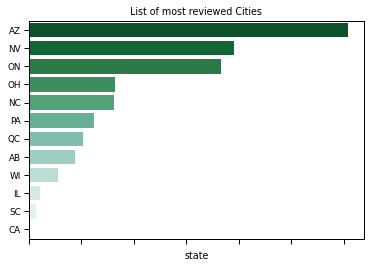

In [172]:
plt.figure(figsize=(6,4))
plt.ylim()
g = sns.barplot(y=state_cout.index, x=state_cout['state'], palette = 'BuGn_r')
plt.title('List of most reviewed Cities');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

### Sentiment Analysis

In [125]:
from collections import Counter 

from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

### Removing unnecessary text from reviews

In [124]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))


In [119]:
def preprocess(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)   
    return text

In [113]:
biz_count = pd.DataFrame(tip_bus['name'].value_counts()[:20])


In [117]:
top_reviewd_busn = tip_bus.loc[tip_bus['name'].isin(biz_count.index)]

In [122]:
top_reviewd_busn['text_processed'] = top_reviewd_busn['text'].apply(preprocess)

### Sentiment analysis 

In [127]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [128]:
top_reviewd_busn['text_sentiment'] = top_reviewd_busn['text_processed'].apply(sentiment)

In [131]:
top_reviewd_busn['sentiment'] = ''

top_reviewd_busn['sentiment'][top_reviewd_busn['text_sentiment'] > 0] = 'positive'
top_reviewd_busn['sentiment'][top_reviewd_busn['text_sentiment'] < 0] = 'negative'
top_reviewd_busn['sentiment'][top_reviewd_busn['text_sentiment'] == 0] = 'neutral'

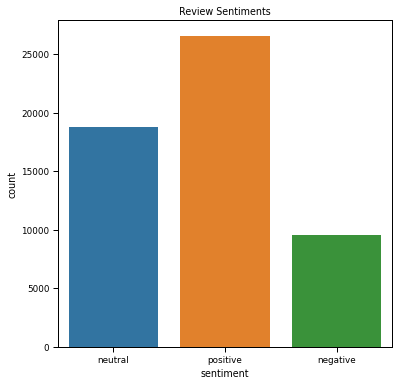

In [133]:
plt.figure(figsize=(6,6))
ax = sns.countplot(top_reviewd_busn['sentiment'])
plt.title('Review Sentiments');